# PythonPlot.jl gallery

From this awesome gist: https://gist.github.com/gizmaa/7214002

In [1]:
using Random
import PythonPlot as plt
plt.using3D()
Random.seed!(2021)

TaskLocalRNG()

## Annotations

sys:1: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.


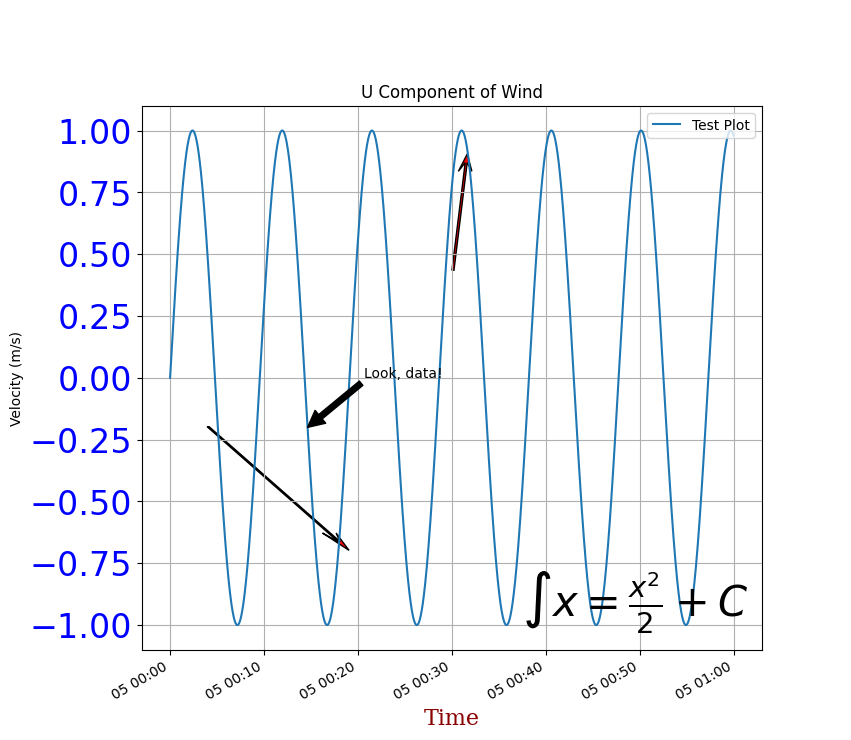

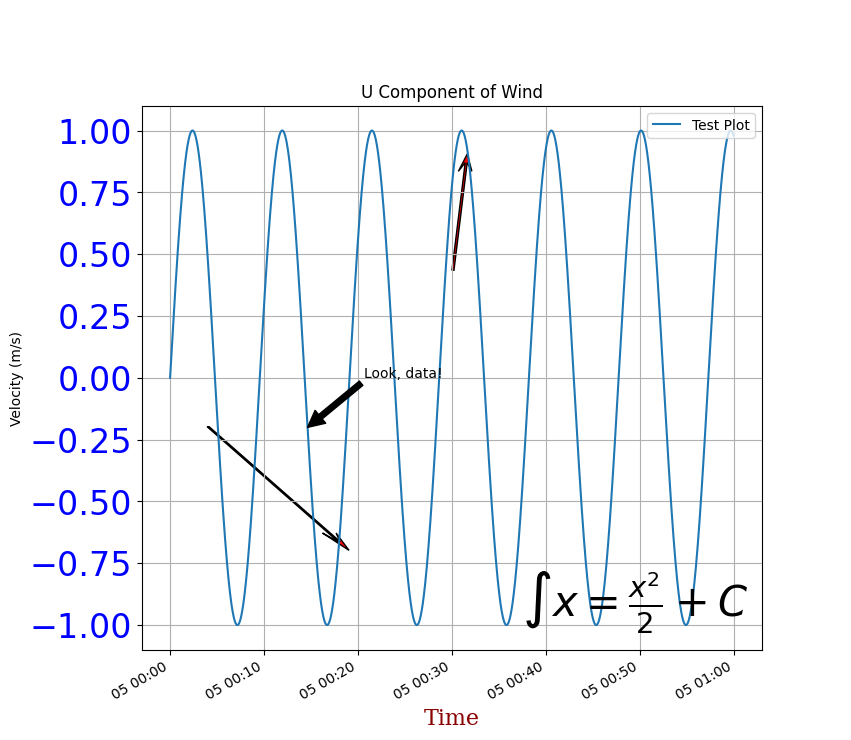

In [2]:
using Dates, LaTeXStrings
import PythonPlot as plt

# Data: Generate an hour of data at 10Hz.

# Generate time array
x = collect(DateTime(2013,10,4):Dates.Millisecond(100):DateTime(2013,10,4,1))
# Convert time from milliseconds from day 0 to days from day 0
x = Dates.value.(x)/1000/60/60/24
y = sin.(2*pi*collect(0:2*pi/(length(x)+1):2*pi-(2*pi/length(x))))

dx = maximum(x) - minimum(x)
dy = maximum(y) - minimum(y)


y2 = 10rand(21) .- 3

x2 = collect(minimum(x):dx/20:maximum(x))
x3 = collect(minimum(x):dx/20:maximum(x))

y3 = 10rand(21) .- 3

fig, ax = plt.subplots(figsize=(8, 8))

# Plot a basic line
ax.plot_date(x,y, linestyle="-", marker="None", label="Test Plot")
# Fit the axis tightly to the plot
ax.axis("tight")
ax.set_title("U Component of Wind")
ax.grid("on")
ax.legend(loc="upper right",fancybox="true")

# Text Styling
font1 = Dict("family"=>"serif",
             "color"=>"darkred",
             "weight"=>"normal",
             "size"=>16)
ax.set_xlabel("Time", fontdict=font1)        ## X Axis font formatting
ax.set_ylabel("Velocity (m/s)")
plt.setp(ax.get_yticklabels(),fontsize=24,color="blue") ## Y Axis font formatting

# Arrow Tests: This arrows orient toward the x-axis, the more horizontal they are the more skewed they look

ax.arrow(x[convert(Int64,floor(length(x)/2))],
        0.4,
        0.0009,
        0.4,
        head_width=0.001,
        width=0.00015,
        head_length=0.07,
        overhang=0.5,
        head_starts_at_zero="true",
        facecolor="red")

ax.arrow(x[convert(Int64,floor(0.3length(x)))]-0.25dx,
        y[convert(Int64,floor(0.3length(y)))]+0.25dy,
        0.25dx,
        -0.25dy,
        head_width=0.001,
        width=0.00015,
        head_length=0.07,
        overhang=0.5,
        head_starts_at_zero="true",
        facecolor="red",
        length_includes_head="true")

# Text Annotation Tests

ax.annotate("Look, data!",
    xy=[x[convert(Int64,floor(length(x)/4.1))];y[convert(Int64,floor(length(y)/4.1))]],
    xytext=[x[convert(Int64,floor(length(x)/4.1))]+0.1dx;y[convert(Int64,floor(length(y)/4.1))]+0.1dy],
    xycoords="data",
    arrowprops=Dict("facecolor"=>"black")) # Julia dictionary objects are automatically converted to Python object when they pass into a PythonPlot function
ax.annotate("Figure Top Right",
    xy=[1;1],
    xycoords="figure fraction",
    xytext=[0,0],
    textcoords="offset points",
    ha="right",
    va="top")
ax.annotate(L"$\int x = \frac{x^2}{2} + C$",
    xy=[1;0],
    xycoords="axes fraction",
    xytext=[-10,10],
    textcoords="offset points",
    fontsize=30.0,
    ha="right",
    va="bottom")

fig.autofmt_xdate(bottom=0.2,rotation=30,ha="right")

fig

## Axis placement

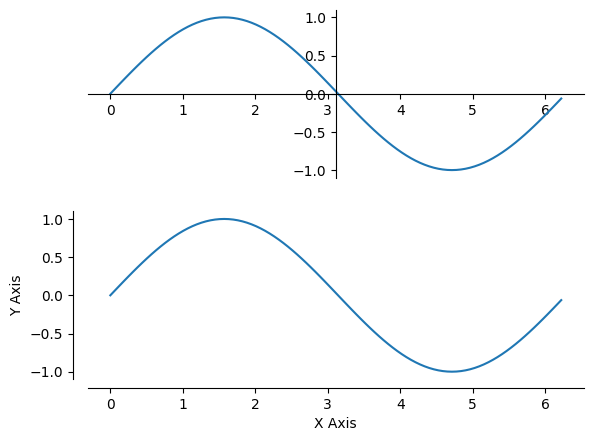

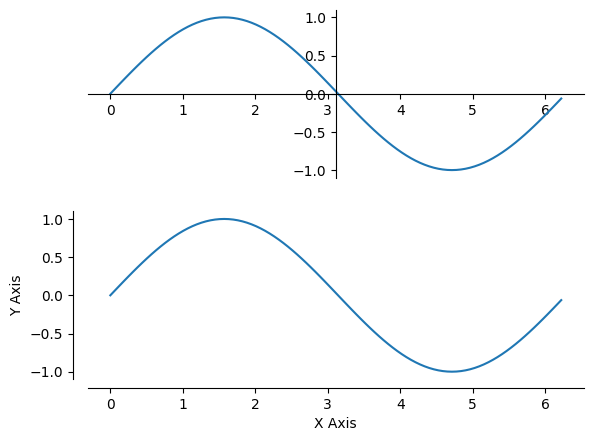

In [3]:
import PythonPlot as plt

# Data
x = 0:pi/50:2pi
y = sin.(x)

fig, axs = plt.subplots(2, 1)

ax = axs[0]

ax.plot(x,y)
ax.axis("tight")
ax.spines["top"].set_visible(false) ## Hide the top edge of the axis
ax.spines["right"].set_visible(false) ## Hide the right edge of the axis
ax.spines["left"].set_position("center") ## Move the right axis to the center
ax.spines["bottom"].set_position("center") ## Most the bottom axis to the center
ax.xaxis.set_ticks_position("bottom") ## Set the x-ticks to only the bottom
ax.yaxis.set_ticks_position("left") ## Set the y-ticks to only the left

ax = axs[1]

ax.plot(x,y)
ax.axis("tight")
ax.spines["top"].set_visible(false) ## Hide the top edge of the axis
ax.spines["right"].set_visible(false) ## Hide the right edge of the axis
ax.xaxis.set_ticks_position("bottom")
ax.yaxis.set_ticks_position("left")
ax.spines["left"].set_position(("axes",-0.03)) ## Offset the left scale from the axis
ax.spines["bottom"].set_position(("axes",-0.05)) ## Offset the bottom scale from the axis
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")

fig

## Bar plot

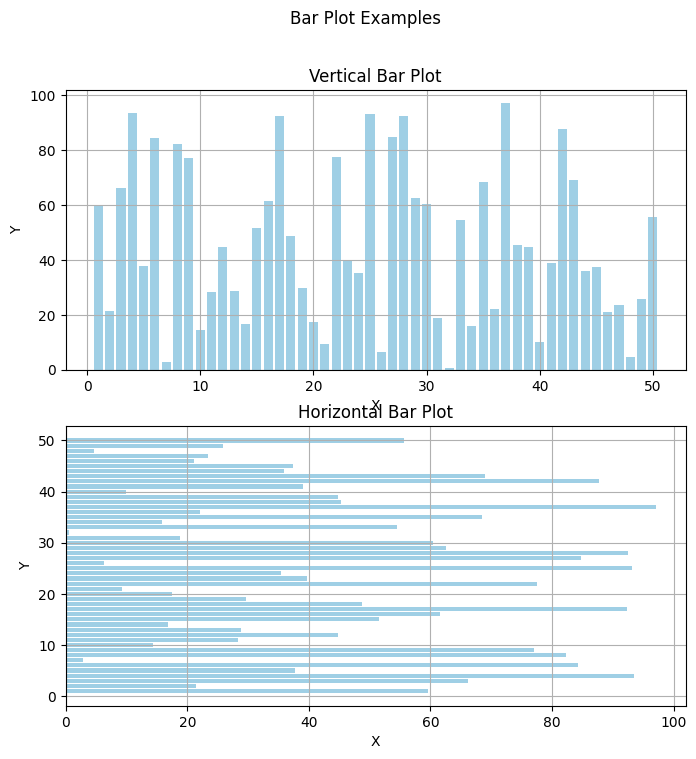

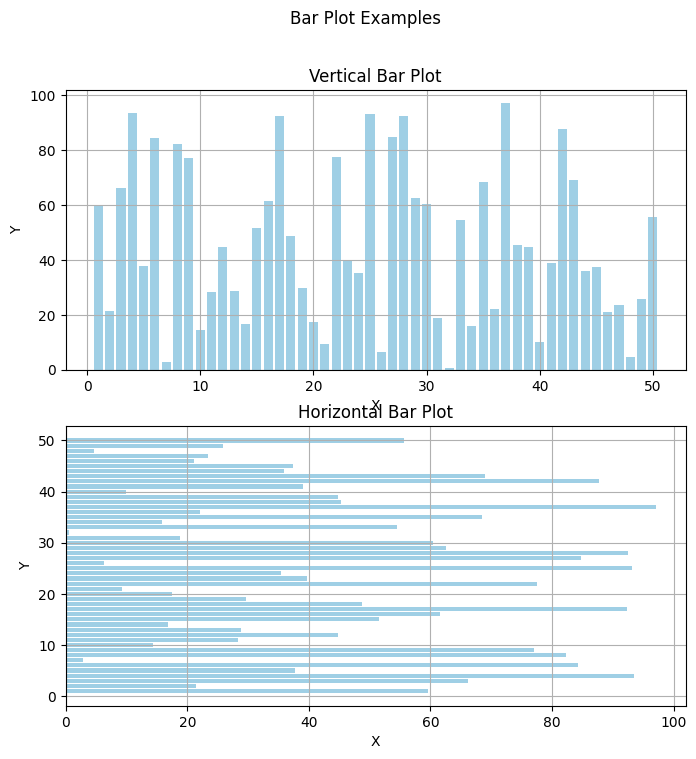

In [4]:
import PythonPlot as plt

x = [1:1:50;]
y = 100*rand(50)

fig, axs = plt.subplots(2, 1, figsize=(8,8))

ax = axs[0]

ax.bar(x,y,color="#0f87bf",align="center",alpha=0.4)
ax.axis("tight")
ax.grid("on")
ax.set_title("Vertical Bar Plot")
ax.set_xlabel("X")
ax.set_ylabel("Y")

ax = axs[1]
ax.barh(x,y,color="#0f87bf",align="center",alpha=0.4)
ax.axis("tight")
ax.set_title("Horizontal Bar Plot")
ax.grid("on")
ax.set_xlabel("X")
ax.set_ylabel("Y")

fig.suptitle("Bar Plot Examples")

fig

## Broken axis subplots

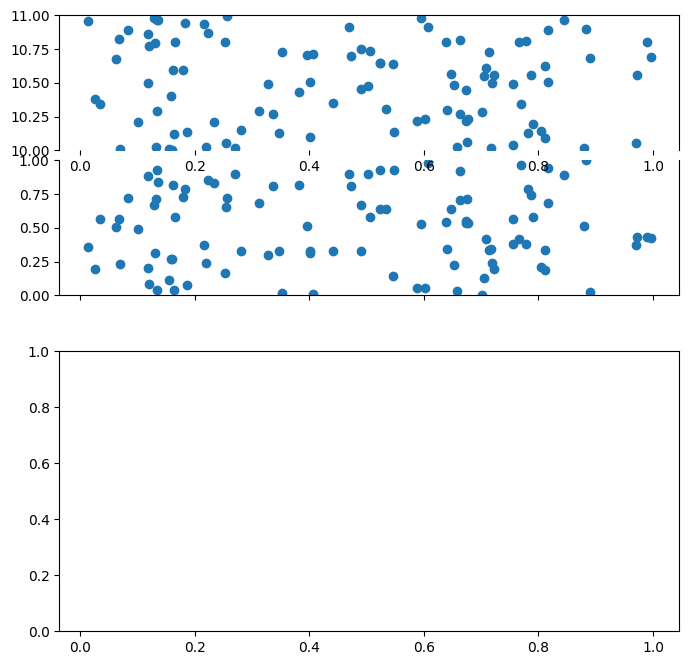

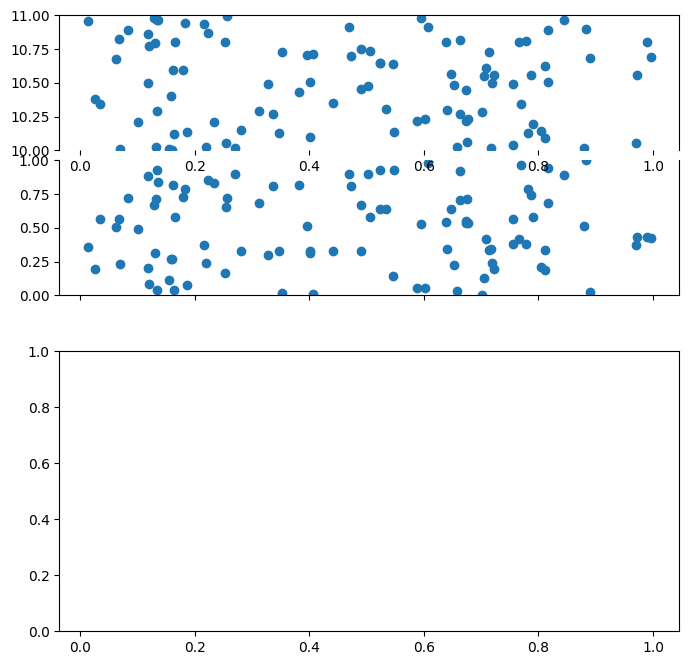

In [5]:
using PythonCall
import PythonPlot as plt

axes_grid1 = pyimport("mpl_toolkits.axes_grid1")

x = rand(100)
y = rand(100)
y2 = rand(100).+10

fig, axes = plt.subplots(2, 1, figsize=(8, 8), sharex=true)

ax = axes[0]
divider = axes_grid1.make_axes_locatable(ax)
ax2 = divider.new_vertical(size="100%", pad=0.1)
fig.add_axes(ax2)

# Lower Portion of First Plot
ax.scatter(x, y)
ax.set_ylim(0, 1)
ax.spines["top"].set_visible(false)

# Upper Portion of First Plot
ax2.scatter(x, y2)
ax2.set_ylim(10, 11)
ax2.tick_params(bottom="off", labelbottom="off")
ax2.spines["bottom"].set_visible(false)

fig

Add Line Break Markings: https://matplotlib.org/examples/pylab_examples/broken_axis.html

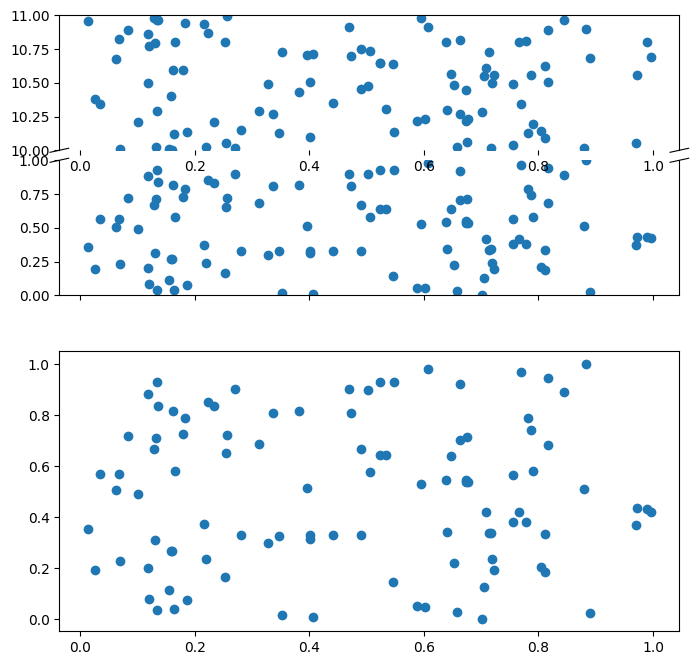

In [6]:
# Upper Line Break Markings
d = 0.015  # how big to make the diagonal lines in axes coordinates
ax2.plot((-d, +d), (-d, +d), transform=ax2.transAxes, color="k", clip_on=false,linewidth=0.8)        ## Left diagonal
ax2.plot((1 - d, 1 + d), (-d, +d), transform=ax2.transAxes, color="k", clip_on=false,linewidth=0.8)  ## Right diagonal

# Lower Line Break Markings
ax.plot((-d, +d), (1 - d, 1 + d), transform=ax.transAxes, color="k", clip_on=false,linewidth=0.8)  ## Left diagonal
ax.plot((1 - d, 1 + d), (1 - d, 1 + d), transform=ax.transAxes, color="k", clip_on=false,linewidth=0.8)  ## Right diagonal

axes[1].scatter(x, y)

fig

## Custom Time

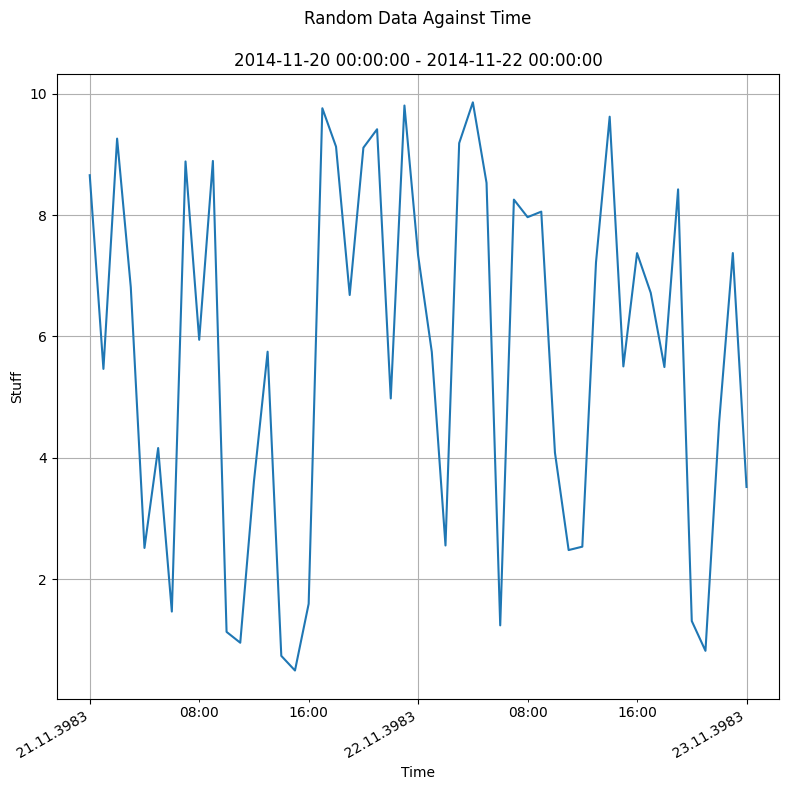

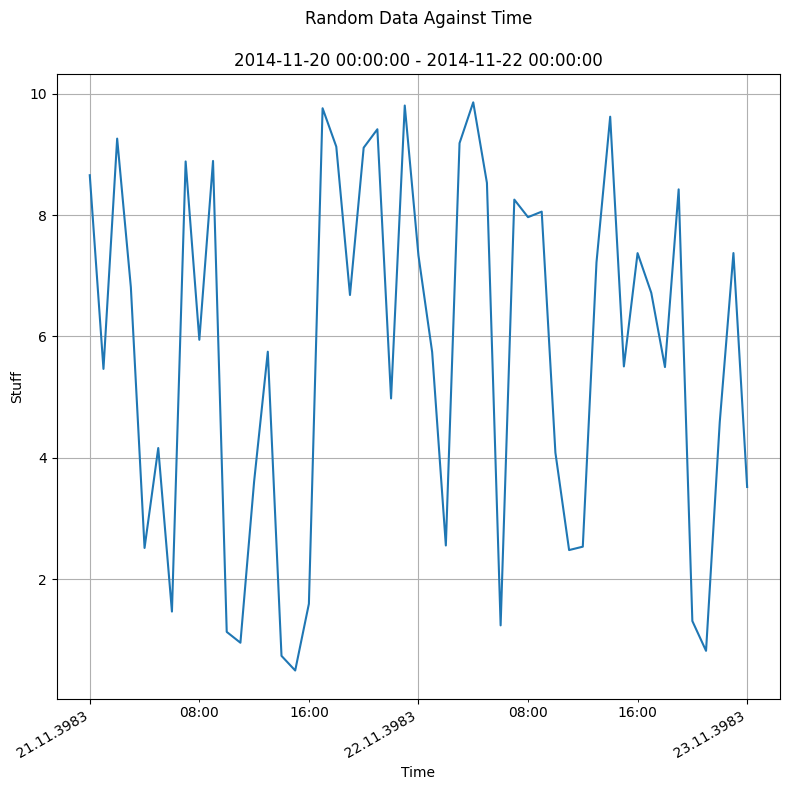

In [7]:
using Dates
using PythonCall
import PythonPlot as plt
matplotlib = pyimport("matplotlib")

# Data
dt = Dates.Hour(1)
time = collect(DateTime(2014,11,20):dt:DateTime(2014,11,22))
y = 10rand(length(time))
dfmt = Dates.DateFormat("yyyy-mm-dd HH:MM:SS")
font1 = Dict("fontname"=>"Sans","style"=>"normal")
# Convert time from milliseconds from day 0 to days from day 0
time2 = Dates.value.(time)/1000/60/60/24

timespan = "\n" * Dates.format(minimum(time),dfmt) * " - " * Dates.format(maximum(time),dfmt)

majorformatter = matplotlib.dates.DateFormatter("%d.%m.%Y")
minorformatter = matplotlib.dates.DateFormatter("%H:%M")
majorlocator = matplotlib.dates.DayLocator(interval=1)
minorlocator = matplotlib.dates.HourLocator(byhour=(8, 16))

# Plot

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot_date(time2,y,linestyle="-",marker="None",label="test")
ax.axis("tight")
ax.set_title("Random Data Against Time\n" * timespan)

ax.grid("on")
ax.set_xlabel("Time")
ax.set_ylabel("Stuff",fontdict=font1)

ax.xaxis.set_major_formatter(majorformatter)
ax.xaxis.set_minor_formatter(minorformatter)
ax.xaxis.set_major_locator(majorlocator)
ax.xaxis.set_minor_locator(minorlocator)

fig.autofmt_xdate(bottom=0.2,rotation=30,ha="right")
fig.set_tight_layout(true)
fig

## Error bar

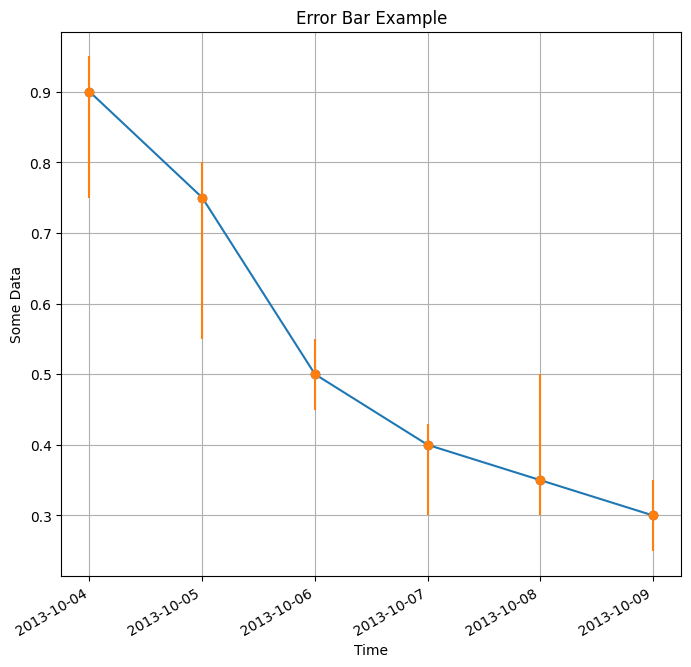

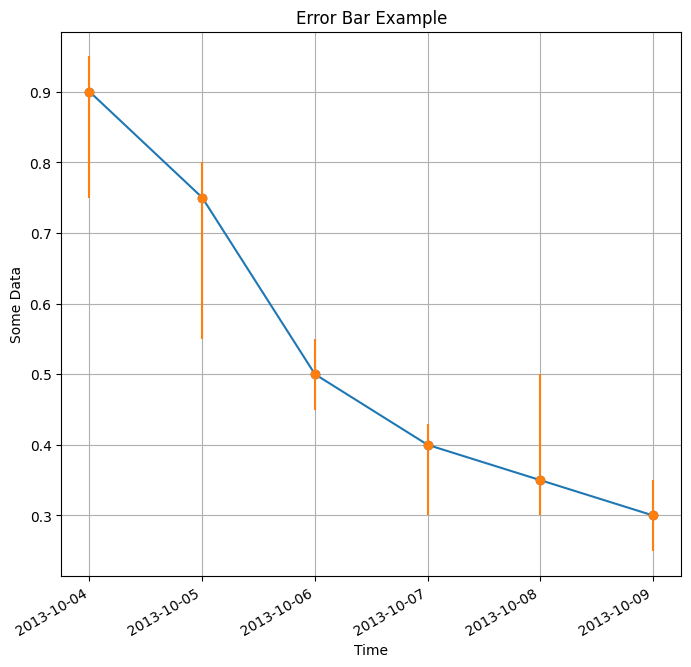

In [8]:
using Dates
import PythonPlot as plt

x = collect(DateTime(2013,10,4):Dates.Day(1):DateTime(2013,10,9))
y = [0.9;0.75;0.5;0.4;0.35;0.3]

uppererror = [0.05 0.05 0.05 0.03 0.15 0.05;]
lowererror = [0.15 0.2 0.05 0.1 0.05 0.05;]
errs = [lowererror; uppererror]

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot_date(x,y,linestyle="-",label="Base Plot") ## Basic line plot
ax.errorbar(x,y,yerr=errs,fmt="o") ## Plot irregular error bars
ax.axis("tight")

ax.set_title("Error Bar Example")
ax.set_xlabel("Time")
ax.set_ylabel("Some Data")
ax.grid("on")

fig.autofmt_xdate(bottom=0.2,rotation=30,ha="right") ## Autoformat the time format and rotate the labels so they don't overlap
fig

## Histogram

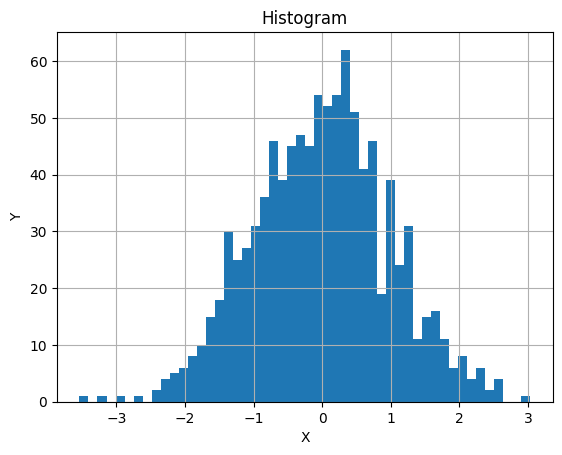

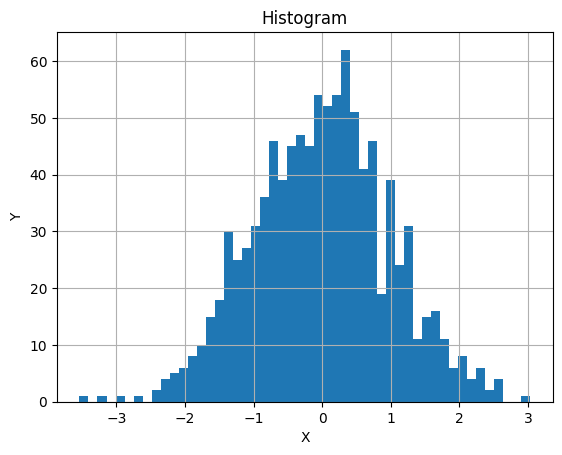

In [9]:
import PythonPlot as plt

x = randn(1000)
nbins = 50
fig, ax = plt.subplots()

ax.hist(x,nbins)

ax.grid("on")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Histogram")

fig

## Major and minor ticks

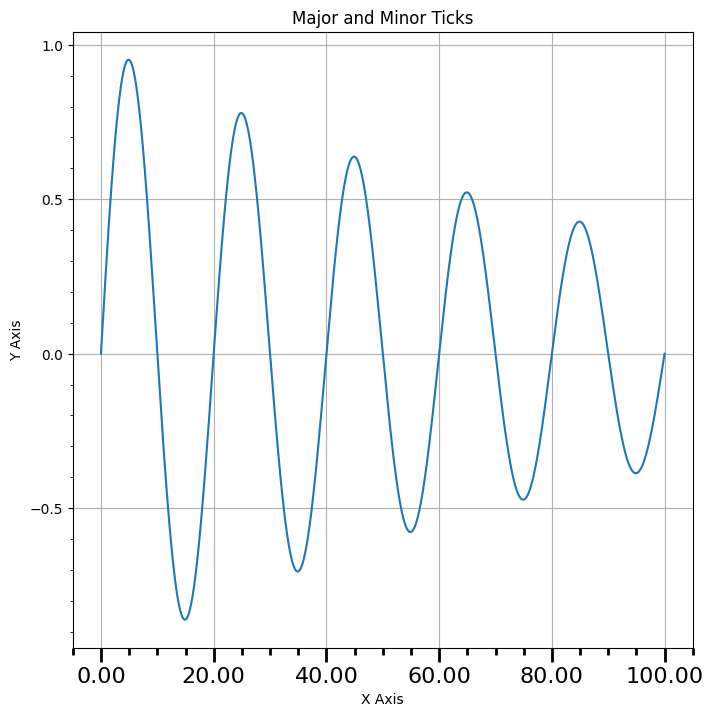

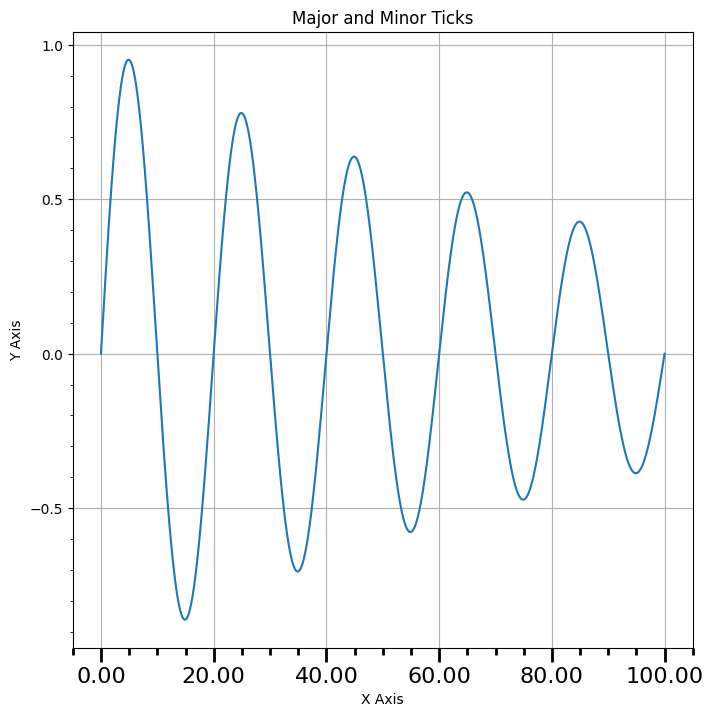

In [10]:
using PythonCall
import PythonPlot as plt
matplotlib = pyimport("matplotlib")

x = collect(0.0:0.01:100.0)
y = @. sin(0.1pi*x) * exp(-0.01x)

fig, ax = plt.subplots(figsize=(8,8))

ax.plot(x,y)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.grid("on")
ax.set_title("Major and Minor Ticks")

#  Set the tick interval
Mx = matplotlib.ticker.MultipleLocator(20) ## Define interval of major ticks
f = matplotlib.ticker.FormatStrFormatter("%1.2f") ## Define format of tick labels
ax.xaxis.set_major_locator(Mx) ## Set interval of major ticks
ax.xaxis.set_major_formatter(f) ## Set format of tick labels

mx = matplotlib.ticker.MultipleLocator(5) ## Define interval of minor ticks
ax.xaxis.set_minor_locator(mx) ## Set interval of minor ticks

My = matplotlib.ticker.MultipleLocator(0.5) ## Define interval of major ticks
ax.yaxis.set_major_locator(My) ## Set interval of major ticks

my = matplotlib.ticker.MultipleLocator(0.1) ## Define interval of minor ticks
ax.yaxis.set_minor_locator(my) ## Set interval of minor ticks

ax.xaxis.set_tick_params(which="major",length=10,width=2,labelsize=16)
ax.xaxis.set_tick_params(which="minor",length=5,width=2)

fig

## Multiple axis

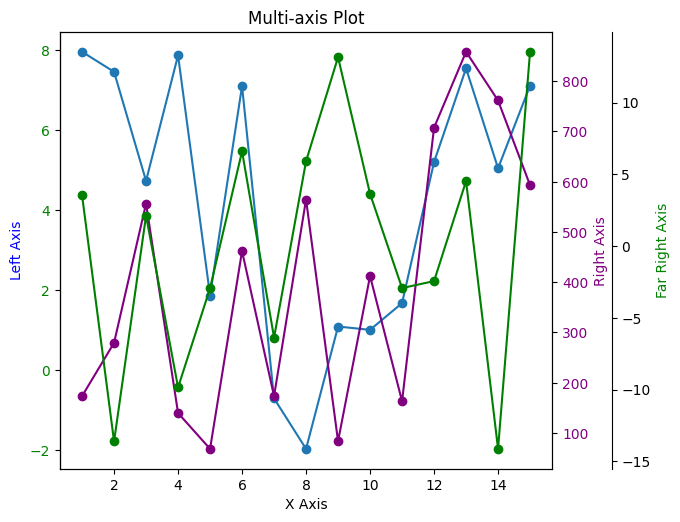

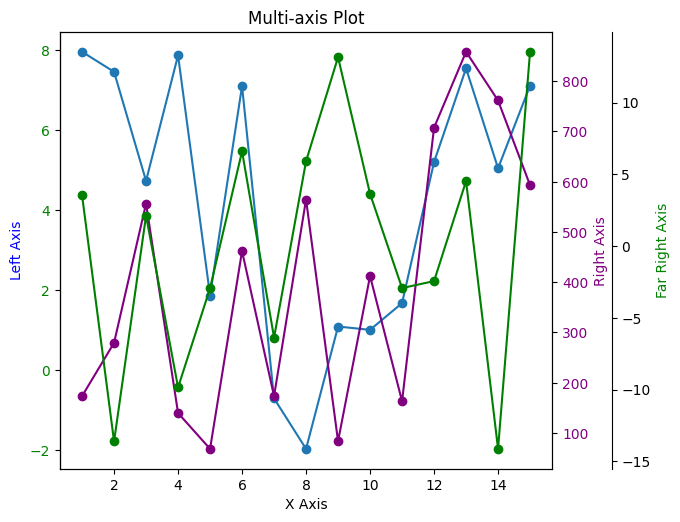

In [11]:
import PythonPlot as plt

n = 15
x = collect(1:n)
y1 = 10rand(n,1) .- 2
y2 = 1000rand(n,1)
y3 = 30rand(n,1) .- 15

fig, ax = plt.subplots()

ax.plot(x,y1,linestyle="-",marker="o",label="First")
ax.set_title("Multi-axis Plot")
ax.set_xlabel("X Axis")
font1 = Dict("color"=>"blue")
ax.set_ylabel("Left Axis",fontdict=font1)
plt.setp(ax.get_yticklabels(),color="blue")

new_position = [0.06;0.06;0.77;0.91]
ax.set_position(new_position)

# Create another axis on top of the current axis
ax2 = ax.twinx()
font2 = Dict("color"=>"purple")
ax2.set_ylabel("Right Axis",fontdict=font2)
ax2.plot(x,y2,color="purple",linestyle="-",marker="o",label="Second")
ax2.set_position(new_position)
plt.setp(ax2.get_yticklabels(),color="purple")

# Create another axis on top of the current axis
ax3 = ax.twinx()
ax3.spines["right"].set_position(("axes",1.12)) ## Offset the y-axis label from the axis itself so it doesn't overlap the second axis
font3 = Dict("color"=>"green")
ax3.set_ylabel("Far Right Axis",fontdict=font3)
ax3.plot(x,y3,color="green",linestyle="-",marker="o",label="Third")
ax3.set_position(new_position)
plt.setp(ax.get_yticklabels(),color="green")

ax.axis("tight")

# Enable just the right part of the frame
ax3.set_frame_on(true) ## Make the entire frame visible
ax3.patch.set_visible(false) ## Make the patch (background) invisible so it doesn't cover up the other axes' plots
ax3.spines["top"].set_visible(false) ## Hide the top edge of the axis
ax3.spines["bottom"].set_visible(false) ## Hide the bottom edge of the axis

fig

### Sharing the Legend Box in Twin Axes

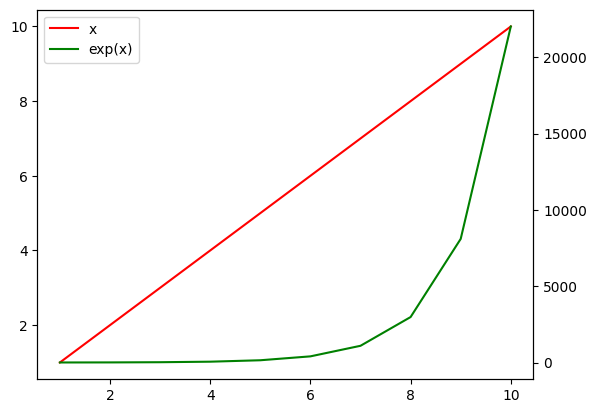

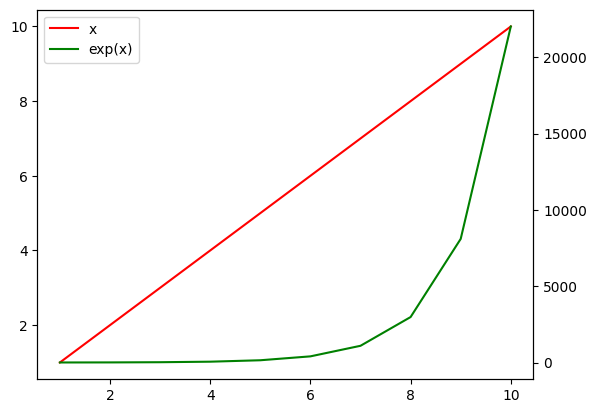

In [12]:
import PythonPlot as plt

x1 = 1:10
fig, ax1 = plt.subplots()
l1 = ax1.plot(x1, x1, "r-")
ax2 = ax1.twinx()
l2 = ax2.plot(x1, exp.(x1), "g-")
ax1.legend([first(l1), first(l2)], ["x", "exp(x)"])
fig

## Pie Chart

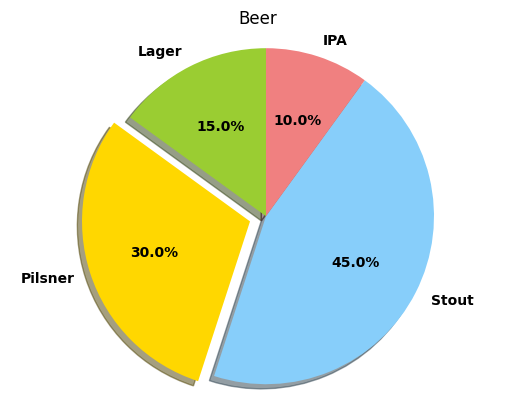

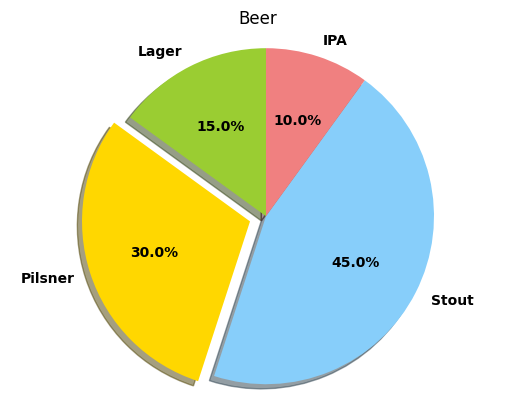

In [13]:
import PythonPlot as plt

labels = ["Lager","Pilsner","Stout","IPA"]
colors = ["yellowgreen","gold","lightskyblue","lightcoral"]

explode = zeros(length(labels))
explode[2] = 0.1 ## Move slice 2 out by 0.1

sizes = [15, 30, 45, 10]

font = Dict("fontname"=>"Sans","weight"=>"semibold")

fig, ax = plt.subplots()
ax.pie(sizes,
        labels=labels,
        shadow=true,
        startangle=90,
        explode=explode,
        colors=colors,
        autopct="%1.1f%%",
        textprops=font)
ax.axis("equal")
ax.set_title("Beer")
fig

## Quiver plots

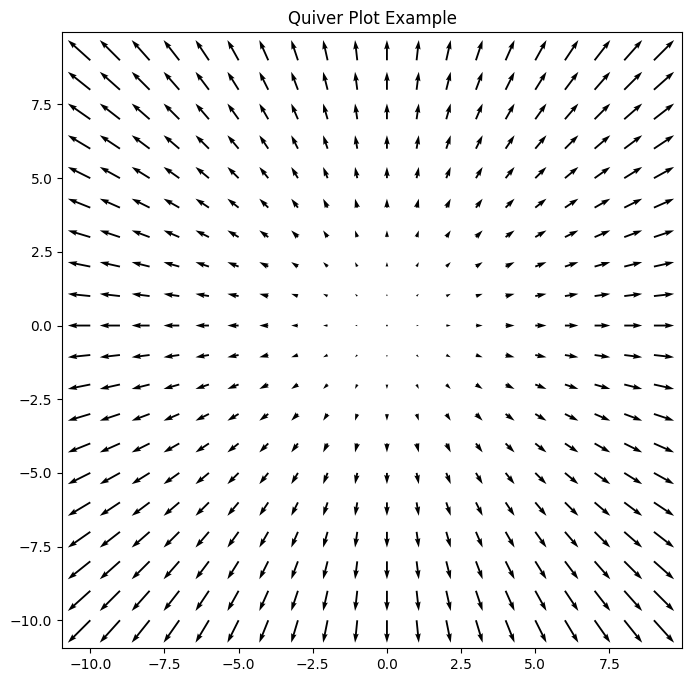

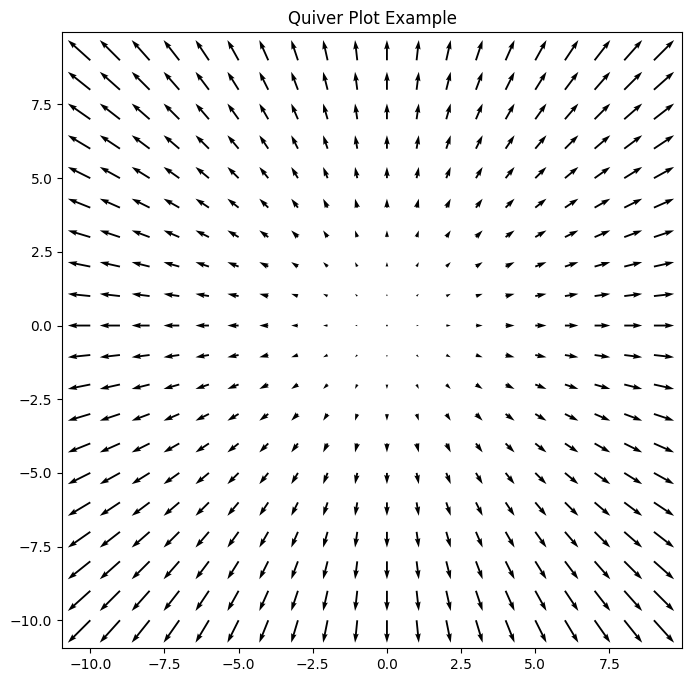

In [14]:
import PythonPlot as plt
R = -10:1:9
X = [R;]'
Y = [R;]
U = repeat([R;]',length(X))
V = repeat([R;],1,length(Y))

fig, ax = plt.subplots(figsize=(8,8))
q = ax.quiver(X,Y,U,V)
ax.quiverkey(q,X=0.07,Y = 0.05, U = 10,coordinates="figure", label="Quiver key, length = 10",labelpos = "E")
ax.set_title("Quiver Plot Example")
fig

## Scatter Plot

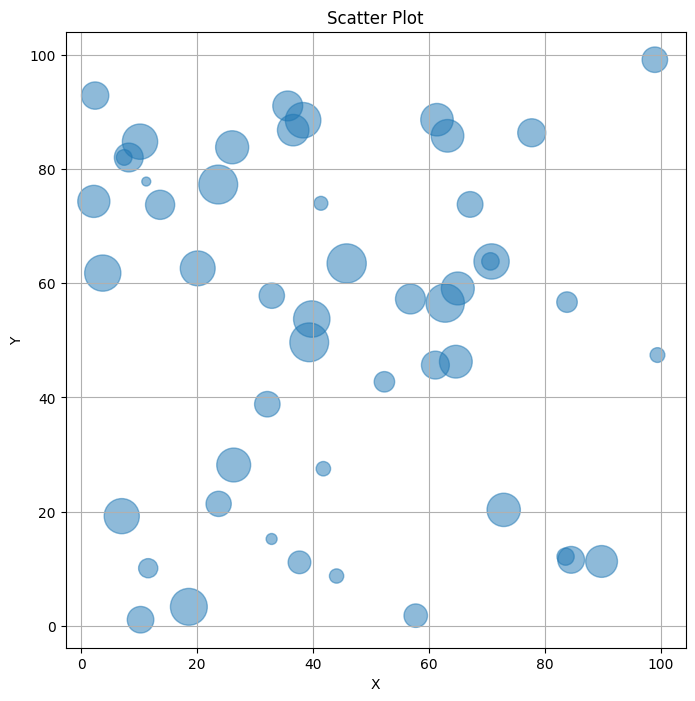

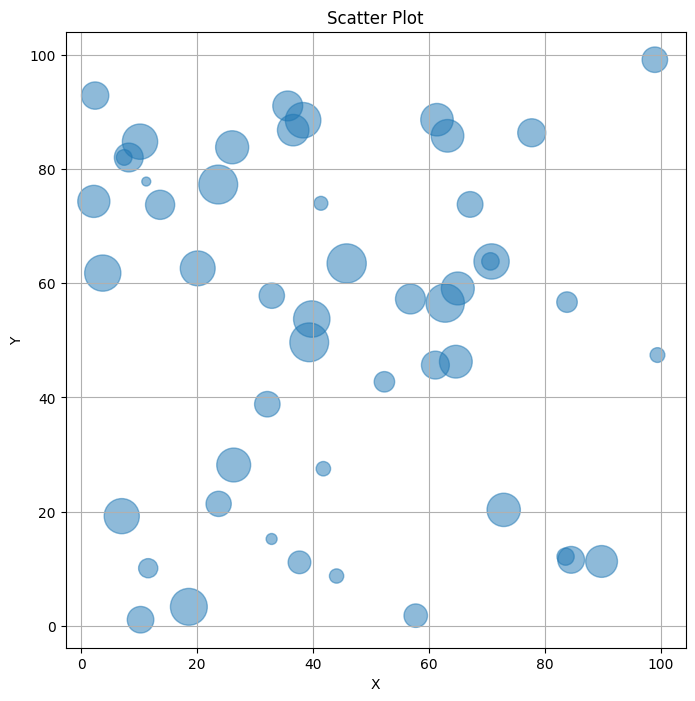

In [15]:
import PythonPlot as plt

x = 100*rand(50)
y = 100*rand(50)
areas = 800*rand(50)

fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(x,y,s=areas,alpha=0.5)
ax.set_title("Scatter Plot")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.grid("on")
fig

## Subplots

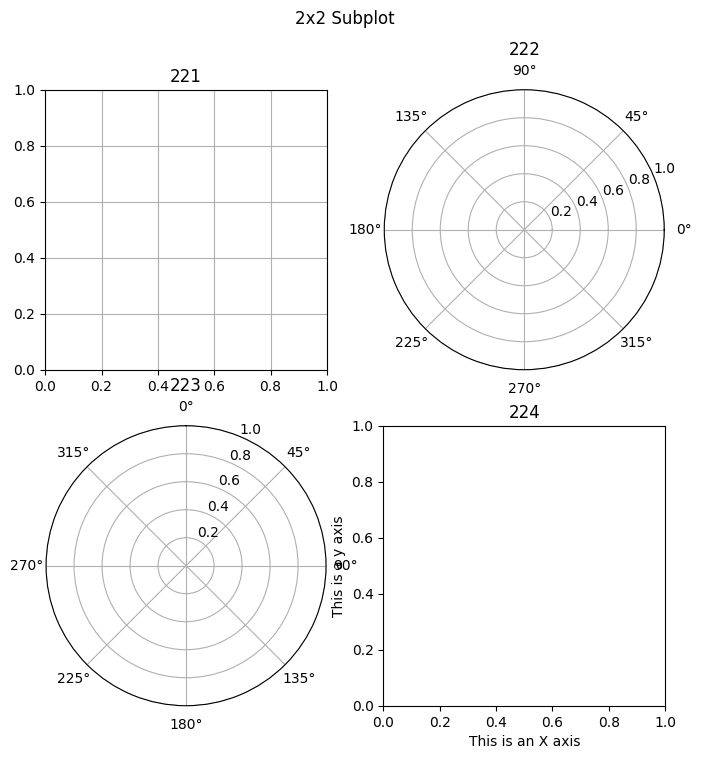

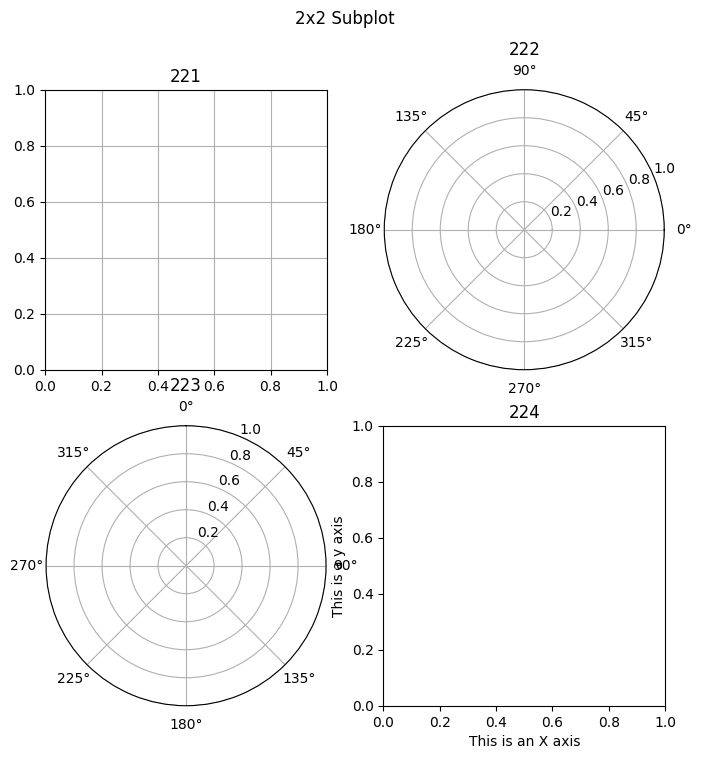

In [16]:
import PythonPlot as plt

fig = plt.figure("PythonPlot_subplot_mixed",figsize=(8,8)) ## Create a new blank figure
##fig.set_figheight(7) # Does not work
##fig.set_figwidth(3) # Doesn not work
plt.subplot(221) ## Create the 1st axis of a 2x2 arrax of axes
plt.grid("on") ## Create a grid on the axis
plt.title("221") ## Give the most recent axis a title
plt.subplot(222,polar="true") ## Create a plot and make it a polar plot, 2nd axis of 2x2 axis grid
plt.title("222")
ax = plt.subplot(223,polar="true") ## Create a plot and make it a polar plot, 3rd axis of 2x2 axis grid
ax.set_theta_zero_location("N") ## Set 0 degrees to the top of the plot
ax.set_theta_direction(-1) ## Switch the polar plot to clockwise
plt.title("223")
plt.subplot(224) ## Create the 4th axis of a 2x2 arrax of axes
plt.xlabel("This is an X axis")
plt.ylabel("This is a y axis")
plt.title("224")
fig.suptitle("2x2 Subplot")

fig

Shared Axis

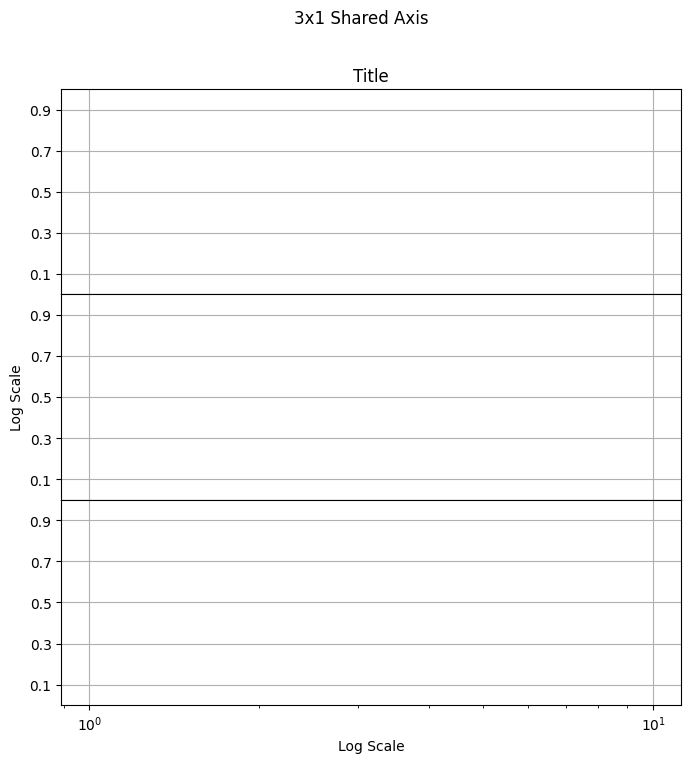

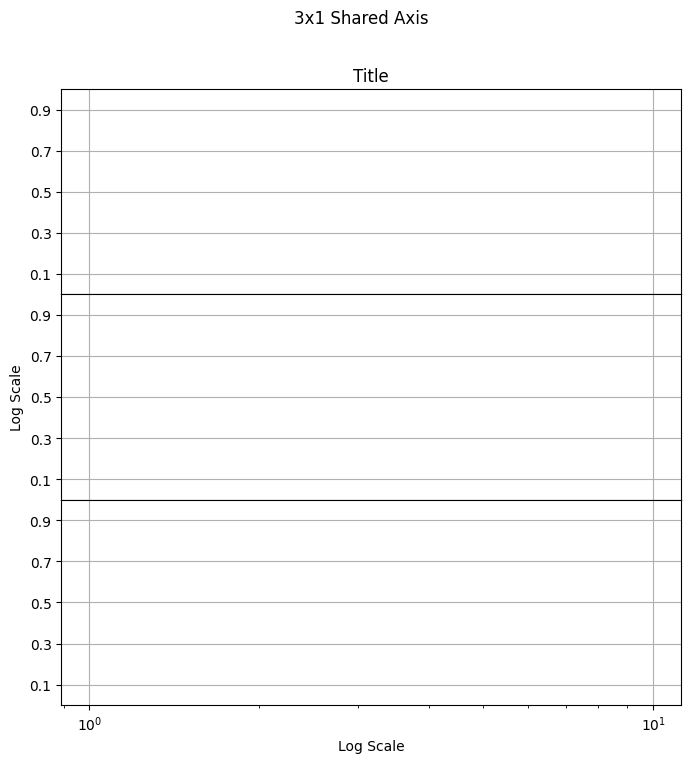

In [17]:
fig = plt.figure("PythonPlot_subplot_touching",figsize=(8,8))
plt.subplots_adjust(hspace=0.0) ## Set the vertical spacing between axes
plt.subplot(311) ## Create the 1st axis of a 3x1 array of axes
ax1 = plt.gca()
ax1.set_xscale("log") ## Set the x axis to a logarithmic scale
plt.setp(ax1.get_xticklabels(),visible=false) ## Disable x tick labels
plt.grid("on")
plt.title("Title")
plt.yticks(0.1:0.2:0.9) ## Set the y-tick range and step size, 0.1 to 0.9 in increments of 0.2
plt.ylim(0.0,1.0) ## Set the y-limits from 0.0 to 1.0
plt.subplot(312,sharex=ax1) ## Create the 2nd axis of a 3x1 array of axes
ax2 = plt.gca()
ax2.set_xscale("log") ## Set the x axis to a logarithmic scale
plt.setp(ax2.get_xticklabels(),visible=false) ## Disable x tick labels
plt.grid("on")
plt.ylabel("Log Scale")
plt.yticks(0.1:0.2:0.9)
plt.ylim(0.0,1.0)
plt.subplot(313,sharex=ax2) ## Create the 3rd axis of a 3x1 array of axes
ax3 = plt.gca()
ax3.set_xscale("log") ## Set the x axis to a logarithmic scale
plt.grid("on")
plt.xlabel("Log Scale")
plt.yticks(0.1:0.2:0.9)
plt.ylim(0.0,1.0)
plt.suptitle("3x1 Shared Axis")

fig

## Surface plot

sys:1: UserWarning: The following kwargs were not used by contour: 'linewidth'


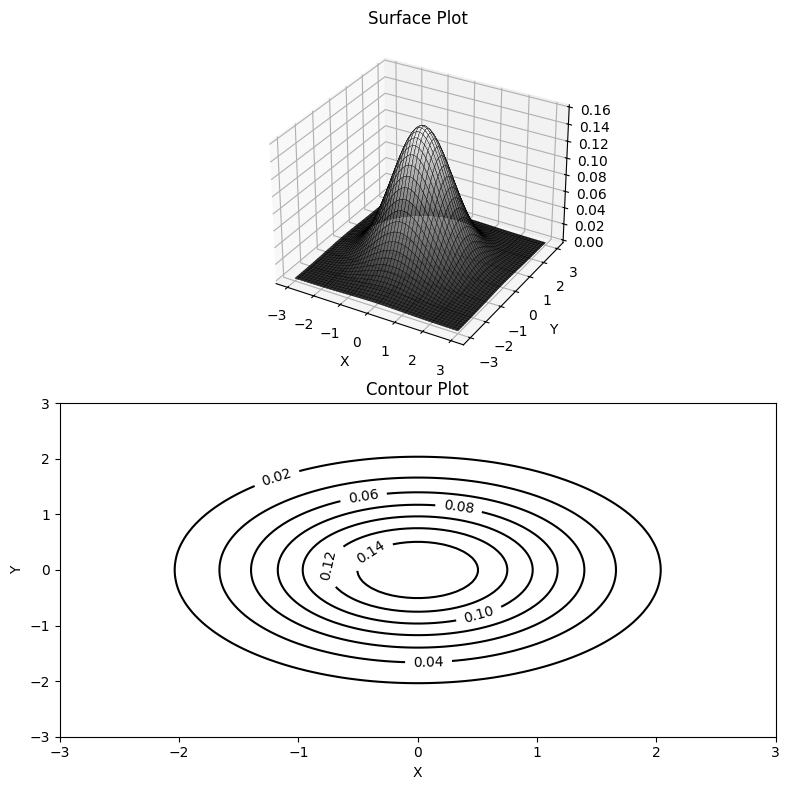

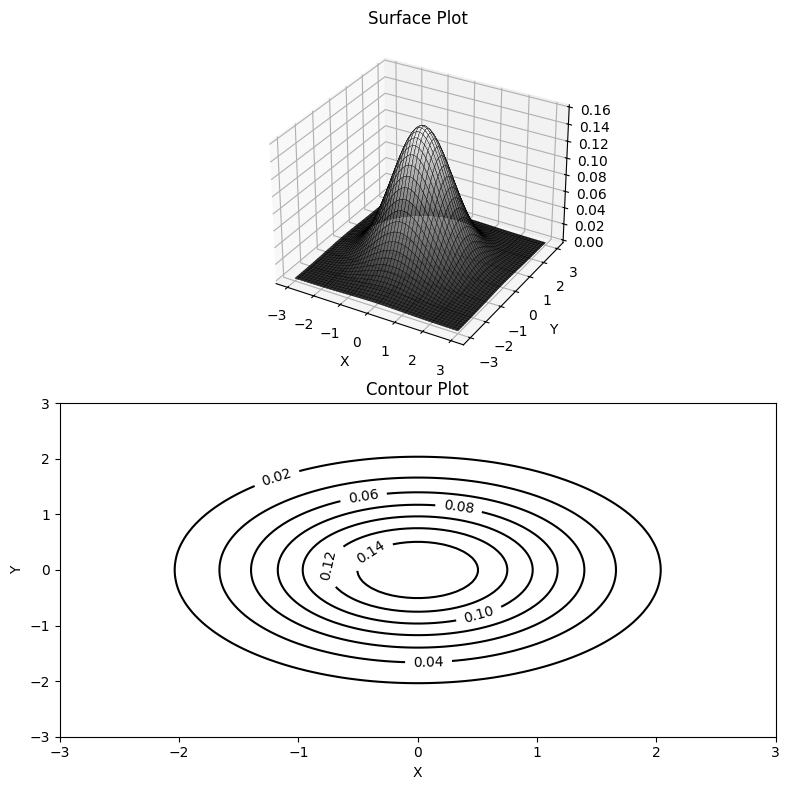

In [18]:
using Distributions
using LinearAlgebra
import PythonPlot as plt
plt.using3D() ## Needed to create a 3D subplot

n = 100
x = range(-3,stop=3,length=n)
y = range(-3,stop=3,length=n)

xgrid = repeat(x',n,1)
ygrid = repeat(y,1,n)

z = zeros(n,n)

for i in 1:n
    for j in 1:n
        z[i:i,j:j] .= pdf(MvNormal(Matrix(1.0I,2,2)),[x[i];y[j]])
    end
end

fig = plt.figure("PythonPlot_surfaceplot",figsize=(8,8))

ax = fig.add_subplot(2,1,1,projection="3d")
ax.plot_surface(xgrid, ygrid, z, rstride=2,edgecolors="k", cstride=2, cmap=plt.ColorMap("gray"), alpha=0.8, linewidth=0.25)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Surface Plot")

ax = fig.add_subplot(2,1,2)
cp = ax.contour(xgrid, ygrid, z, colors="black", linewidth=2.0)
ax.clabel(cp, inline=1, fontsize=10)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Contour Plot")
fig.tight_layout()

fig

## Windrose bar and line plots

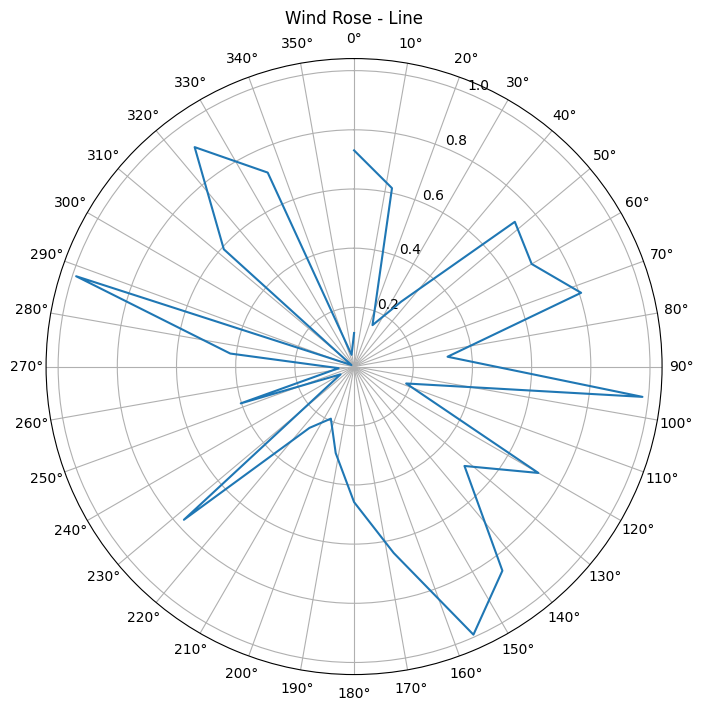

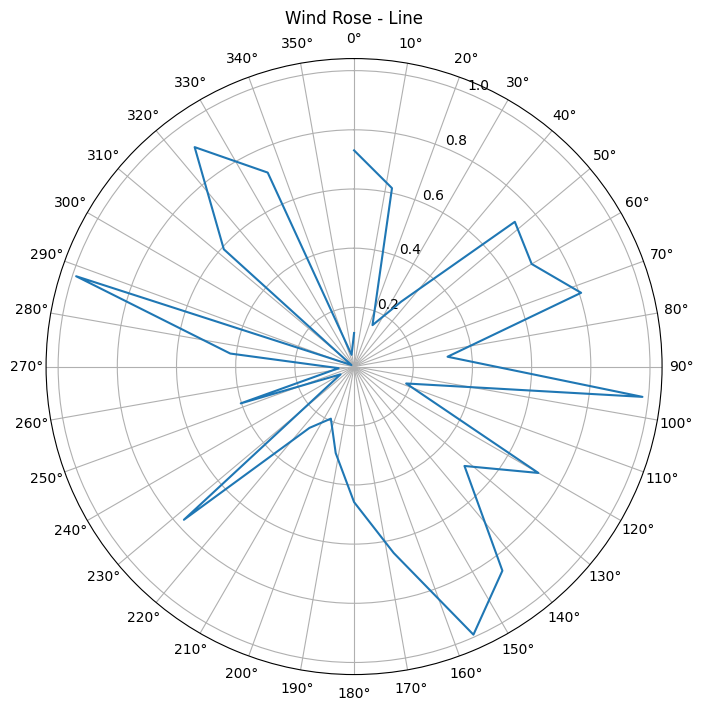

In [19]:
import PythonPlot as plt
theta = collect(0:2pi/30:2pi)
r = rand(length(theta))
width = 2pi/length(theta)

#  Windrose Line Plot
fig = plt.figure(figsize=(8,8)) ## Create a new figure
ax = plt.axes(polar="true") ## Create a polar axis

ax.set_title("Wind Rose - Line")
ax.plot(theta,r,linestyle="-",marker="None") ## Basic line plot

dtheta = 10

ax.set_thetagrids(collect(0:dtheta:360-dtheta)) ## Show grid lines from 0 to 360 in increments of dtheta
ax.set_theta_zero_location("N") ## Set 0 degrees to the top of the plot
ax.set_theta_direction(-1) ## Switch to clockwise

fig

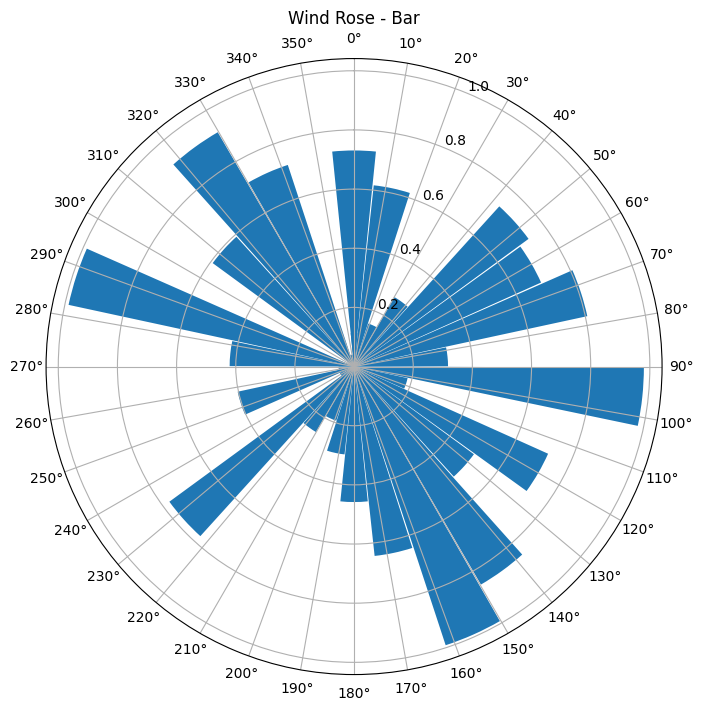

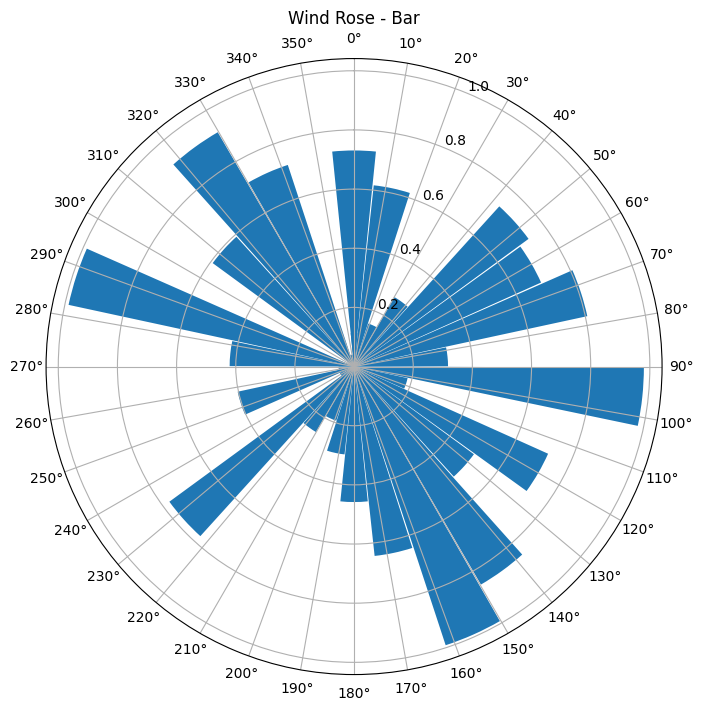

In [20]:
fig = plt.figure("PythonPlot_windrose_barplot",figsize=(8,8)) ## Create a new figure
ax = plt.axes(polar="true") ## Create a polar axis
ax.set_title("Wind Rose - Bar")
ax.bar(theta,r,width=width) ## Bar plot

dtheta = 10
ax.set_thetagrids(collect(0:dtheta:360-dtheta)) ## Show grid lines from 0 to 360 in increments of dtheta
ax.set_theta_zero_location("N") ## Set 0 degrees to the top of the plot
ax.set_theta_direction(-1) ## Switch to clockwise

fig